In [1]:
import numpy as np
import h5py
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from collections.abc import Iterable
import time
import math
import PyFiles.MLFunctionsForPytorch as MLFun
import pandas as pd

batchSize = 32 #Batch size of training set

# Define our neural networks

In [2]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(3)
    self.linear1 = nn.Linear(in_features=3, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    self.act2 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.norm2(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

class MLP2Input(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(2)
    self.linear1 = nn.Linear(in_features=2, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    self.act2 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.norm2(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

class MLP3Input(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.norm0 = nn.BatchNorm1d(3)
    self.linear1 = nn.Linear(in_features=3, out_features=64)
    self.norm1 = nn.BatchNorm1d(64)
    self.act1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(in_features=64, out_features=16)
    self.norm2 = nn.BatchNorm1d(16)
    self.act2 = nn.LeakyReLU()
    self.output = nn.Linear(in_features=16, out_features = 3)
    


  def forward(self, x):
    '''
      Forward pass
    '''
    x = self.norm0(x)
    x = self.linear1(x)
    x = self.norm1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.norm2(x)
    x = self.act2(x)
    x = self.output(x)
    
    
    return x

In [3]:
class ThreeOutputRescaleLog(MLFun.ProcessFunction):
    def __init__(self, firstScale, secondScale, thirdScale):
        self.firstScale = firstScale
        self.secondScale = secondScale
        self.thirdScale = thirdScale
    
    def process(self, input):
        #Process each column by their respective scales
        
        colOne = input[:, 0]
        colOne = colOne / self.firstScale
        colOne = np.log(colOne)
        
        colTwo = input[:, 1]
        colTwo = colTwo / self.secondScale
        colTwo = np.log(colTwo)
        
        colThree = input[:, 2]
        colThree = colThree / self.thirdScale
        colThree = np.log(colThree)
        
        output = torch.stack((colOne, colTwo, colThree), axis = -1)
        
        return output
    
    def invertProcess(self, input):
        
        colOne = input[:, 0]
        colOne = np.exp(colOne)
        colOne = colOne * self.firstScale
        colOne = torch.Tensor(colOne)
        
        colTwo = input[:, 1]
        colTwo = np.exp(colTwo)
        colTwo = colTwo * self.secondScale
        colTwo = torch.Tensor(colTwo)
        
        colThree = input[:, 2]
        colThree = np.exp(colThree)
        colThree = colThree * self.thirdScale
        colThree = torch.Tensor(colThree)
        
        output = torch.stack((colOne, colTwo, colThree), axis = -1)
        output = output.cpu().detach().numpy()
        
        return output
    

# Read in the data

In [4]:
numPoints = 1000
#numPoints = 500
#numPoints = 20000

#filename = 'Data_Fuchs_v_2.2_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
#filename = 'Dataset/Data_Fuchs_v_2.2_Wright_Pat_Narrow_Range_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
#filename = 'Dataset/Data_Fuchs_v_2.3_energy_limit_0.01_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'

# filename = 'Dataset/Data_Fuchs_v_2.7_Wright_Pat_Narrow_Range_with_Focal_Dist_energy_limit_0.01_deviation_0.0_lambda_um_0.8_points_' \
#                  + str(numPoints) + '_seed_0.h5'
# filename = 'Dataset/Data_Fuchs_v_2.8_Wright_Pat_Narrow_Range_with_Focal_Dist_energy_limit_0.01_deviation_0.0_' \
#             + 'lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
#filename = 'Dataset/Data_Fuchs_v_2.91_Wright_Pat_intens_focalD_thick_scan_lambda_um_0.8_points_' + str(numPoints) + '_seed_3.h5'
#filename = 'Dataset/Data_Fuchs_v_2.9_Wright_Pat_Narrow_Range_with_Focal_Dist_energy_limit_0.01_deviation_0.0_lambda_um_0.8_points_20000_seed_0.h5'
filename = 'datasets/Energy/fuchs_v3_points_1000_noise_10.h5'


h5File = h5py.File(filename, 'r+')

In [5]:
#Read columns

intens = h5File['Intensity_(W_cm2)']
duration = h5File['Pulse_Duration_(fs)']
thickness = h5File['Target_Thickness (um)']
spotSize = h5File['Spot_Size_(FWHM um)']
focalDist = h5File['Focal_Distance_(um)']
maxEnergy = h5File['Max_Proton_Energy_(MeV)']
totalEnergy = h5File['Total_Proton_Energy_(MeV)']
avgEnergy = h5File['Avg_Proton_Energy_(MeV)']


#Convert columns into numpy arrays
npIntens = np.fromiter(intens, float)
npDuration = np.fromiter(duration, float)
npThickness = np.fromiter(thickness, float)
npSpot = np.fromiter(spotSize, float)
npDist = np.fromiter(focalDist, float)
npMaxEnergy = np.fromiter(maxEnergy, float)
npTotalEnergy = np.fromiter(totalEnergy, float)
npAvgEnergy = np.fromiter(avgEnergy, float)


# #Join all of those arrays into one big numpy array
# npFile = np.dstack((npIntens, npDuration, npThickness, npSpot, npMaxEnergy, npTotalEnergy, npAvgEnergy))
# npFile = npFile.reshape(numPoints, 7)

# npTrain = npFile[:math.floor(.9*numPoints), 0:7]
# #npTest = npFile[math.floor(.9*numPoints):, 0:7]

# npTrain = npFile[:, 0:7]

# #Two input version
# npFile = np.dstack((npIntens, npThickness, npMaxEnergy, npTotalEnergy, npAvgEnergy))
# npFile = npFile.reshape(numPoints, 5)
# npTrain = npFile[:math.floor(.9*numPoints), 0:5]
# npTest = npFile[math.floor(.9*numPoints):, 0:5]

#Three input version
npFile = np.dstack((npIntens, npThickness, npDist, npMaxEnergy, npTotalEnergy, npAvgEnergy))
npFile = npFile.reshape(numPoints, 6)

#If I want to take a subset of the dataset, do it in the line below
numPoints =1000
np.random.shuffle(npFile)
npFile = npFile[:numPoints]
print(npFile)

npTrain = npFile[:math.floor(.9*numPoints), 0:6]
npTest = npFile[math.floor(.9*numPoints):, 0:6]

# print(npTrain)

#npTrain = npFile[:, 0:5]
#npTrain = npFile[:, 0:6]

#print(npFile.shape)

[[ 4.44395321e+18  1.05779763e+00 -9.16457420e+00  6.97533744e-01
   1.30143584e+08  1.38255843e-01]
 [ 1.10440671e+18  2.92605619e+00  4.17359513e+00  3.56197484e-02
   1.17630456e+06  9.77275383e-03]
 [ 5.10398498e+18  6.88212979e+00  2.89575567e+00  2.27027273e-01
   5.36352688e+07  3.76560466e-02]
 ...
 [ 2.14720600e+18  6.42288796e+00 -4.85526727e+00  4.27868768e-02
   3.81567510e+06  1.32589270e-02]
 [ 2.51451486e+18  5.57145416e+00 -2.53728155e+00  8.75000003e-02
   9.26360118e+06  2.58138088e-02]
 [ 5.24430012e+18  2.15659752e+00 -8.40228469e+00  6.11679169e-01
   1.68783705e+08  1.18208316e-01]]


In [6]:
#Check to see if there's any negative values that are not focal distance
for index in range(numPoints):
    if(npFile[index, 0] < 0):
        print(index)
        print(npFile[index, 0])
        
    elif(npFile[index, 3] < 0):
        print(index)
        print(npFile[index, 3])
        
    elif(npFile[index, 4] < 0):
        print(index)
        print(npFile[index, 4])
        
    elif(npFile[index, 5] < 0):
        print(index)
        print(npFile[index, 5])

In [7]:
# #filename_test = 'Data_Fuchs_v_2.2_Wright_Pat_Narrow_Range_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
# #filename_test = 'Dataset/Data_Fuchs_v_2.2_Wright_Pat_Narrow_Range_lambda_um_0.8_points_' + str(100000) + '_seed_1.h5'
# #filename_test = 'Data_Fuchs_v_2.3_energy_limit_0.01_lambda_um_0.8_points_' + str(numPoints) + '_seed_0.h5'
# filename_test = 'Dataset/Data_Fuchs_v_2.7_Wright_Pat_Narrow_Range_with_Focal_Dist_energy_limit_0.01_deviation_0.0_lambda_um_0.8_points_100000_seed_3.h5'

# h5FileTest = h5py.File(filename_test, 'r+')

# #Read columns

# intens = h5FileTest['Intensity_(W_cm2)']
# duration = h5FileTest['Pulse_Duration_(fs)']
# thickness = h5FileTest['Target_Thickness (um)']
# spotSize = h5FileTest['Spot_Size_(FWHM um)']
# focalDist = h5FileTest['Focal_Distance_(um)']
# maxEnergy = h5FileTest['Max_Proton_Energy_(MeV)']
# totalEnergy = h5FileTest['Total_Proton_Energy_(MeV)']
# avgEnergy = h5FileTest['Avg_Proton_Energy_(MeV)']


# #Convert columns into numpy arrays
# npIntens = np.fromiter(intens, float)
# npDuration = np.fromiter(duration, float)
# npThickness = np.fromiter(thickness, float)
# npSpot = np.fromiter(spotSize, float)
# npDist = np.fromiter(focalDist, float)
# npMaxEnergy = np.fromiter(maxEnergy, float)
# npTotalEnergy = np.fromiter(totalEnergy, float)
# npAvgEnergy = np.fromiter(avgEnergy, float)


# # #Join all of those arrays into one big numpy array
# # npFile = np.dstack((npIntens, npDuration, npThickness, npSpot, npMaxEnergy, npTotalEnergy, npAvgEnergy))

# # npFile = npFile.reshape(100000, 7)

# # #npTrain = npFile[:math.floor(.9*numPoints), 0:7]
# # #npTest = npFile[math.floor(.9*numPoints):, 0:7]

# # npTest = npFile[:, 0:7]

# # #Two input version
# # npFile = np.dstack((npIntens, npThickness, npMaxEnergy, npTotalEnergy, npAvgEnergy))
# # npFile = npFile.reshape(100000, 5)

# # npTest = npFile[:, 0:5]

# #Three input version
# npFile = np.dstack((npIntens, npThickness, npDist, npMaxEnergy, npTotalEnergy, npAvgEnergy))
# npFile = npFile.reshape(100000, 6)

# npTest = npFile[:, 0:6]

# print(npFile.shape)

# Prepare our dataset

In [8]:
training_dataset = h5File.create_dataset(name=None, data=npTrain)
test_dataset = h5File.create_dataset(name=None, data=npTest)

In [9]:
#Choose our loss function
loss_function = nn.MSELoss()

In [10]:
#List which epochs we should test

#epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100, 150, 200, 250]
#epochList = [1, 5, 10, 15, 20, 25, 50, 75, 100, 150, 200]
#epochList = [1, 5, 10, 15, 20, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
#epochList = [1, 5, 10, 15, 20, 25]
#epochList = [1, 5, 10, 15, 20, 30, 35, 40, 45]
#epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
#epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 100]
#epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
#epochList = [1,5, 10, 15, 20, 25, 30, 35]
#epochList = [1]
#epochList = [1, 5, 35]
epochList = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100]
#epochList = [1, 5, 20]
#epochList = [5, 10, 15]

In [11]:
#Initialize neural network and dataloader
#model1Layer = MultiRegressor1Layer().to('cuda')
#model = MLP().to('cuda')

# modelMSE, modelPercentError, trainMSE, trainPercent, timeList = MLFun.getModelError(model, epochList, loss_function, 
#                                                                                     training_dataset, test_dataset, 
#                                                                                     numInputs = 3, processInputs = MLFun.logFirstCol,
#                                                                                     processTargets = MLFun.logAll)

#Fuchs 2.91 scaling parameters: max = 1e-2, total = 1e5, avg = 1e-3, intens = 1e18
#Fuchs 2.92 scaling parameters: max = 1e0, total = 1e8, avg = 1e-1

start_time = time.time()

maxScale = 1e0
totalScale = 1e8
avgScale = 1e-1
intensScale = 1e19

targetProcess = ThreeOutputRescaleLog(maxScale, totalScale, avgScale)
inputProcess = MLFun.LogFirstColRescaleFun(intensScale)

modelMSE, modelPercentError, trainMSE, trainPercent, timeList, cpuTime = MLFun.getModelError(MLP3Input, epochList, loss_function, 
                                                                                    training_dataset, test_dataset, 
                                                                                    numInputs = 3, processInputs = inputProcess,
                                                                                    processTargets = targetProcess)

end_time = time.time()  # record the end time

elapsed_time = end_time - start_time  # calculate elapsed time

print("Elapsed time: {} seconds".format(elapsed_time))

Training with 1 epochs.
Starting epoch 1
Loss after mini-batch     1: 0.009
Loss after mini-batch    11: 0.113
Loss after mini-batch    21: 0.090
Training process has finished.
Calculate error for test
Calculate error for train
Training with 5 epochs.
Starting epoch 1
Loss after mini-batch     1: 0.007
Loss after mini-batch    11: 0.101
Loss after mini-batch    21: 0.088
Starting epoch 2
Loss after mini-batch     1: 0.008
Loss after mini-batch    11: 0.067
Loss after mini-batch    21: 0.055
Starting epoch 3
Loss after mini-batch     1: 0.006
Loss after mini-batch    11: 0.044
Loss after mini-batch    21: 0.037
Starting epoch 4
Loss after mini-batch     1: 0.005
Loss after mini-batch    11: 0.026
Loss after mini-batch    21: 0.030
Starting epoch 5
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.021
Loss after mini-batch    21: 0.024
Training process has finished.
Calculate error for test
Calculate error for train
Training with 10 epochs.
Starting epoch 1
Loss after min

Starting epoch 15
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Starting epoch 16
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Starting epoch 17
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 18
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 19
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.002
Starting epoch 20
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.004
Starting epoch 21
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.002
Starting epoch 22
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.004
Starting epoch 2

Loss after mini-batch    21: 0.002
Starting epoch 26
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 27
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Starting epoch 28
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Starting epoch 29
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Starting epoch 30
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Starting epoch 31
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 32
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.004
Starting epoch 33
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-

Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 17
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 18
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 19
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 20
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Starting epoch 21
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.002
Starting epoch 22
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Starting epoch 23
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Starting epoch 24
Loss after mini-batch     1: 0.000
Loss after mini-

Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Starting epoch 40
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Starting epoch 41
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 42
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.004
Starting epoch 43
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Starting epoch 44
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.003
Starting epoch 45
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 46
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 47
Loss after mini-batch     1: 0.000
Loss after mini-

Loss after mini-batch    21: 0.002
Starting epoch 58
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 59
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 60
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Training process has finished.
Calculate error for test
Calculate error for train
Training with 70 epochs.
Starting epoch 1
Loss after mini-batch     1: 0.014
Loss after mini-batch    11: 0.111
Loss after mini-batch    21: 0.090
Starting epoch 2
Loss after mini-batch     1: 0.006
Loss after mini-batch    11: 0.070
Loss after mini-batch    21: 0.068
Starting epoch 3
Loss after mini-batch     1: 0.007
Loss after mini-batch    11: 0.046
Loss after mini-batch    21: 0.051
Starting epoch 4
Loss after mini-batch     1: 0.003
Loss after mini-batch    11: 0.033
Loss after mini-batch    21: 0.033
S

Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 67
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 68
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.001
Starting epoch 69
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 70
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.003
Training process has finished.
Calculate error for test
Calculate error for train
Training with 80 epochs.
Starting epoch 1
Loss after mini-batch     1: 0.013
Loss after mini-batch    11: 0.124
Loss after mini-batch    21: 0.094
Starting epoch 2
Loss after mini-batch     1: 0.008
Loss after mini-batch    11: 0.077
Loss after mini-batch    21: 0.077
Starting epoch 3
Loss after mini-batch     1: 0.008
Loss after mini-batch    11: 0.059


Starting epoch 65
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 66
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 67
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.002
Starting epoch 68
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.002
Starting epoch 69
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Starting epoch 70
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 71
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.003
Starting epoch 72
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.002
Starting epoch 7

Loss after mini-batch    21: 0.003
Starting epoch 53
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.001
Starting epoch 54
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.003
Starting epoch 55
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 56
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 57
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.001
Starting epoch 58
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.001
Starting epoch 59
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.002
Starting epoch 60
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-

Starting epoch 31
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.001
Starting epoch 32
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.004
Loss after mini-batch    21: 0.001
Starting epoch 33
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 34
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Starting epoch 35
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 36
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 37
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.002
Loss after mini-batch    21: 0.002
Starting epoch 38
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.001
Loss after mini-batch    21: 0.002
Starting epoch 3

Starting epoch 100
Loss after mini-batch     1: 0.000
Loss after mini-batch    11: 0.003
Loss after mini-batch    21: 0.002
Training process has finished.
Calculate error for test
Calculate error for train
Elapsed time: 55.30246162414551 seconds


In [12]:
def splitErrorList(errorList):
    maxEnergyError = []
    totalEnergyError = []
    avgEnergyError = []

    for element in errorList:
        maxEnergyError.append(element[0])
        totalEnergyError.append(element[1])
        avgEnergyError.append(element[2])
        
    return maxEnergyError, totalEnergyError, avgEnergyError

In [13]:
# print(model1LayerMSE)
# print(model1LayerPercentError)
# print('\n')
# print(trainMSE)
# print(trainPercent)

maxEnergyMSE, totalEnergyMSE, avgEnergyMSE = splitErrorList(modelMSE)
maxEnergyPercent, totalEnergyPercent, avgEnergyPercent = splitErrorList(modelPercentError)

trainMaxMSE, trainTotalMSE, trainAvgMSE = splitErrorList(trainMSE)
trainMaxPercent, trainTotalPercent, trainAvgPercent = splitErrorList(trainPercent)

#print(trainMaxMSE)
#print(maxEnergyMSE)

# Now plot errors and running time

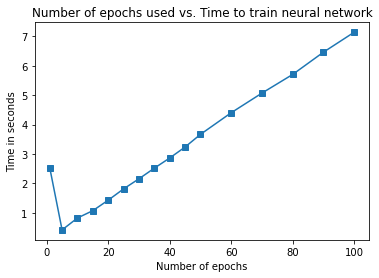

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#Time spent plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList, timeList, marker='s')
plt.title("Number of epochs used vs. Time to train neural network")
plt.xlabel("Number of epochs")
plt.ylabel("Time in seconds")


#plt.legend(loc='upper left');
plt.show()

In [15]:
for epochElement, timeElement in zip(epochList, timeList):
    
    minuteValue = timeElement / 60
    
    print("Number of epochs:", epochElement)
    print("Time spent:", minuteValue, "minutes", '\n')

Number of epochs: 1
Time spent: 0.042123075326283774 minutes 

Number of epochs: 5
Time spent: 0.00704418420791626 minutes 

Number of epochs: 10
Time spent: 0.013796838124593098 minutes 

Number of epochs: 15
Time spent: 0.017948671181996664 minutes 

Number of epochs: 20
Time spent: 0.02387941281000773 minutes 

Number of epochs: 25
Time spent: 0.0302652637163798 minutes 

Number of epochs: 30
Time spent: 0.035975829760233564 minutes 

Number of epochs: 35
Time spent: 0.041999046007792154 minutes 

Number of epochs: 40
Time spent: 0.047751243909200033 minutes 

Number of epochs: 45
Time spent: 0.05396586259206136 minutes 

Number of epochs: 50
Time spent: 0.061129212379455566 minutes 

Number of epochs: 60
Time spent: 0.07338480949401856 minutes 

Number of epochs: 70
Time spent: 0.08449339866638184 minutes 

Number of epochs: 80
Time spent: 0.09506905476252238 minutes 

Number of epochs: 90
Time spent: 0.10766587654749553 minutes 

Number of epochs: 100
Time spent: 0.118962482611338

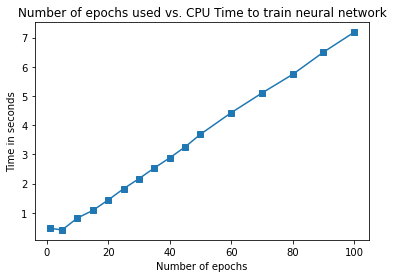

In [16]:
#CPU Time spent plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList, cpuTime, marker='s')
plt.title("Number of epochs used vs. CPU Time to train neural network")
plt.xlabel("Number of epochs")
plt.ylabel("Time in seconds")


#plt.legend(loc='upper left');
plt.show()

In [17]:
for epochElement, timeElement in zip(epochList, cpuTime):
    
    minuteValue = timeElement / 60
    
    print("Number of epochs:", epochElement)
    print("CPU Time spent:", minuteValue, "minutes", '\n')

Number of epochs: 1
CPU Time spent: 0.007891475966666662 minutes 

Number of epochs: 5
CPU Time spent: 0.006957774849999998 minutes 

Number of epochs: 10
CPU Time spent: 0.013752740016666673 minutes 

Number of epochs: 15
CPU Time spent: 0.01808155828333334 minutes 

Number of epochs: 20
CPU Time spent: 0.024023020933333326 minutes 

Number of epochs: 25
CPU Time spent: 0.030439897633333324 minutes 

Number of epochs: 30
CPU Time spent: 0.03617182193333332 minutes 

Number of epochs: 35
CPU Time spent: 0.042273402500000015 minutes 

Number of epochs: 40
CPU Time spent: 0.04803375701666669 minutes 

Number of epochs: 45
CPU Time spent: 0.05427307003333333 minutes 

Number of epochs: 50
CPU Time spent: 0.06148192923333333 minutes 

Number of epochs: 60
CPU Time spent: 0.07378018830000001 minutes 

Number of epochs: 70
CPU Time spent: 0.08498450866666664 minutes 

Number of epochs: 80
CPU Time spent: 0.09564276045 minutes 

Number of epochs: 90
CPU Time spent: 0.1082952561666667 minutes 

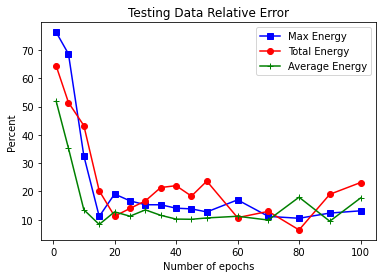

In [18]:
#Percent Error plot
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

startIndex = 0

plt.plot(epochList[startIndex:], maxEnergyPercent[startIndex:], c='b', marker="s", label='Max Energy')
plt.plot(epochList[startIndex:], totalEnergyPercent[startIndex:], c='r', marker="o", label='Total Energy')
plt.plot(epochList[startIndex:], avgEnergyPercent[startIndex:], c='g', marker='+', label='Average Energy')
plt.title("Testing Data Relative Error")
plt.xlabel("Number of epochs")
plt.ylabel("Percent")
plt.legend(loc='upper right')

data = {'Epochs': epochList[startIndex:], 
        'Max Energy': maxEnergyPercent[startIndex:]}
df = pd.DataFrame(data)

# Write DataFrame to CSV
df.to_csv('data_2hl_3rd'+str(batchSize) + str(numPoints)+'.csv', index=False)


plt.show()

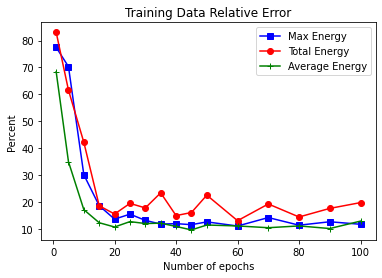

In [19]:
#Percent Error plot for training data
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainMaxPercent[startIndex:], c='b', marker="s", label='Max Energy')
plt.plot(epochList[startIndex:], trainTotalPercent[startIndex:], c='r', marker="o", label='Total Energy')
plt.plot(epochList[startIndex:], trainAvgPercent[startIndex:], c='g', marker='+', label='Average Energy')
plt.title("Training Data Relative Error")
plt.xlabel("Number of epochs")
plt.ylabel("Percent")
plt.legend(loc='upper right')
plt.show()

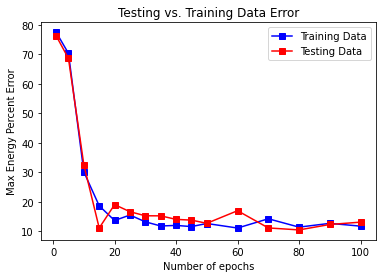

In [20]:
#Compare errors of train and test using just the max energy % error

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainMaxPercent[startIndex:], c='b', marker="s", label='Training Data')
plt.plot(epochList[startIndex:], maxEnergyPercent[startIndex:], c='r', marker="s", label='Testing Data')

plt.title("Testing vs. Training Data Error")
plt.xlabel("Number of epochs")
plt.ylabel("Max Energy Percent Error")
plt.legend(loc='upper right')
plt.show()

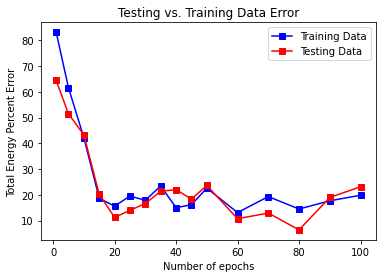

In [21]:
#Compare errors of train and test using just the total energy % error

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainTotalPercent[startIndex:], c='b', marker="s", label='Training Data')
plt.plot(epochList[startIndex:], totalEnergyPercent[startIndex:], c='r', marker="s", label='Testing Data')

plt.title("Testing vs. Training Data Error")
plt.xlabel("Number of epochs")
plt.ylabel("Total Energy Percent Error")
plt.legend(loc='upper right')
plt.show()

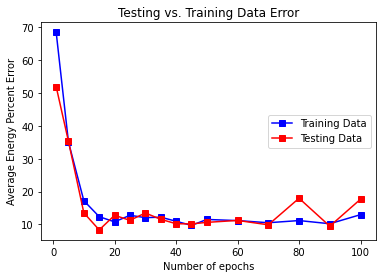

In [22]:
#Compare errors of train and test using just the avg energy % error

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

plt.plot(epochList[startIndex:], trainAvgPercent[startIndex:], c='b', marker="s", label='Training Data')
plt.plot(epochList[startIndex:], avgEnergyPercent[startIndex:], c='r', marker="s", label='Testing Data')

plt.title("Testing vs. Training Data Error")
plt.xlabel("Number of epochs")
plt.ylabel("Average Energy Percent Error")
plt.legend(loc='center right')
plt.show()

In [23]:
for epoch, maxError, totalError, avgError in zip(epochList, maxEnergyPercent, totalEnergyPercent, avgEnergyPercent):
    print("Number of epochs:", epoch)
    print("Max energy percent error:", maxError)
    print("Total energy percent error:", totalError)
    print("Average energy percent error:", avgError, '\n')

Number of epochs: 1
Max energy percent error: 76.27972158216782
Total energy percent error: 64.37406810225784
Average energy percent error: 51.88356660208954 

Number of epochs: 5
Max energy percent error: 68.61174876424103
Total energy percent error: 51.44398667998572
Average energy percent error: 35.273124723112424 

Number of epochs: 10
Max energy percent error: 32.597832507182815
Total energy percent error: 43.289471438164654
Average energy percent error: 13.539751527702512 

Number of epochs: 15
Max energy percent error: 11.164968650878663
Total energy percent error: 20.247456510412174
Average energy percent error: 8.349476251486438 

Number of epochs: 20
Max energy percent error: 19.095979754425855
Total energy percent error: 11.256772549906204
Average energy percent error: 12.7958288728431 

Number of epochs: 25
Max energy percent error: 16.688657505933968
Total energy percent error: 13.997127240345923
Average energy percent error: 11.258731963311167 

Number of epochs: 30
Max e

Text(0, 0.5, 'Average Energy Error (MeV)')

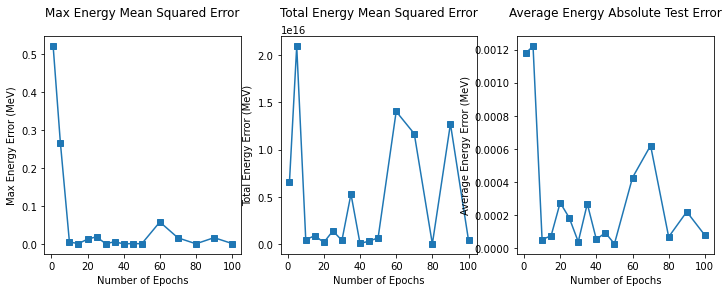

In [24]:
fig = plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.plot(epochList[startIndex:], maxEnergyMSE[startIndex:], marker = 's')
plt.title("Max Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Max Energy Error (MeV)')

plt.subplot(1, 3, 2)
plt.plot(epochList[startIndex:], totalEnergyMSE[startIndex:], marker = 's')
plt.title("Total Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Total Energy Error (MeV)')

plt.subplot(1, 3, 3)
plt.plot(epochList[startIndex:], avgEnergyMSE[startIndex:], marker = 's')
plt.title("Average Energy Absolute Test Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Average Energy Error (MeV)')

Text(0, 0.5, 'Average Energy Error (MeV)')

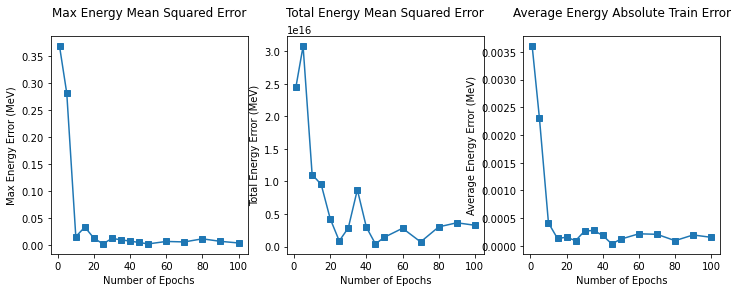

In [25]:
fig = plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.plot(epochList[startIndex:], trainMaxMSE[startIndex:], marker='s')
plt.title("Max Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Max Energy Error (MeV)')

plt.subplot(1, 3, 2)
plt.plot(epochList[startIndex:], trainTotalMSE[startIndex:], marker='s')
plt.title("Total Energy Mean Squared Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Total Energy Error (MeV)')

plt.subplot(1, 3, 3)
plt.plot(epochList[startIndex:], trainAvgMSE[startIndex:], marker='s')
plt.title("Average Energy Absolute Train Error", pad = 20)
plt.xlabel('Number of Epochs')
plt.ylabel('Average Energy Error (MeV)')

In [26]:
def listSubtract(list1, list2):
    result = []
    
    for x, y in zip(list1, list2):
        difference = x - y
        difference = abs(difference)
        result.append(difference)
        
    
    return result

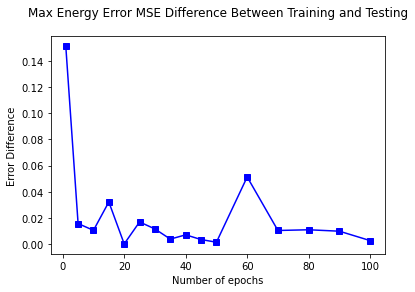

In [27]:
#Compare train and test MSE errors on the max energy

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

maxMSEDiff = listSubtract(trainMaxMSE, maxEnergyMSE)

plt.plot(epochList[startIndex:], maxMSEDiff[startIndex:], c='b', marker="s")

plt.title("Max Energy Error MSE Difference Between Training and Testing", pad = 20)
plt.xlabel("Number of epochs")
plt.ylabel("Error Difference")
#plt.legend(loc='upper left')
plt.show()

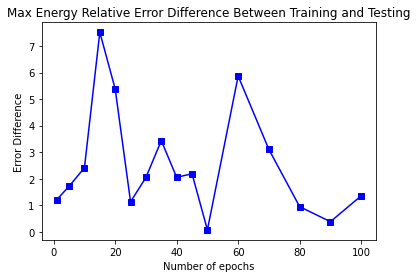

In [28]:
#Compare train and test percent errors on the max energy

fig = plt.figure()
#ax1 = fig.add_subplot(1,1,1)

maxPercentDiff = listSubtract(trainMaxPercent, maxEnergyPercent)

plt.plot(epochList[startIndex:], maxPercentDiff[startIndex:], c='b', marker="s")

plt.title("Max Energy Relative Error Difference Between Training and Testing")
plt.xlabel("Number of epochs")
plt.ylabel("Error Difference")
#plt.legend(loc='upper left')
plt.show()

In [29]:
for epoch, maxError, totalError, avgError in zip(epochList, maxEnergyMSE, totalEnergyMSE, avgEnergyMSE):
    print("Number of epochs:", epoch)
    print("Max energy MSE:", maxError)
    print("Total energy MSE:", totalError)
    print("Average energy MSE:", avgError, '\n')

Number of epochs: 1
Max energy MSE: 0.5199512293647863
Total energy MSE: 6609495291518118.0
Average energy MSE: 0.0011790887172201355 

Number of epochs: 5
Max energy MSE: 0.26617115092376453
Total energy MSE: 2.0961597602374428e+16
Average energy MSE: 0.0012196866901536137 

Number of epochs: 10
Max energy MSE: 0.005078157156878117
Total energy MSE: 445558041430348.0
Average energy MSE: 5.0909215164999556e-05 

Number of epochs: 15
Max energy MSE: 0.0010815158246147423
Total energy MSE: 879377241919426.9
Average energy MSE: 7.402645065500413e-05 

Number of epochs: 20
Max energy MSE: 0.012553877583552748
Total energy MSE: 161580969530838.03
Average energy MSE: 0.0002738813513404208 

Number of epochs: 25
Max energy MSE: 0.018959444401048527
Total energy MSE: 1382066363531144.2
Average energy MSE: 0.0001829157732556738 

Number of epochs: 30
Max energy MSE: 0.0007095306321900738
Total energy MSE: 378080328579372.0
Average energy MSE: 3.7537597540312305e-05 

Number of epochs: 35
Max en